In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data=pd.read_excel('salary.xlsx')
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

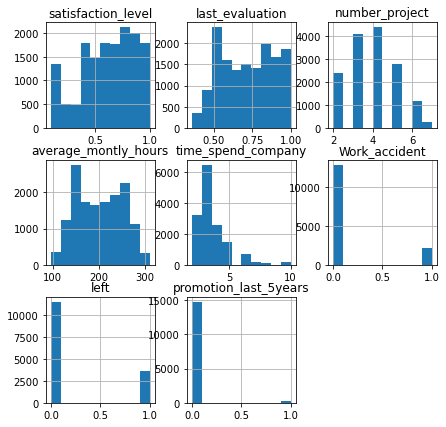

In [3]:
data.hist (figsize=(7,7))

In [4]:
x=data.iloc[:,:-1]
x.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

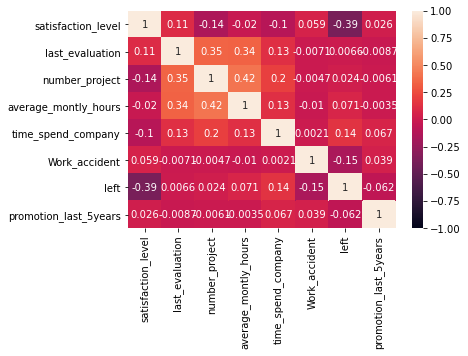

In [6]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

In [7]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium


In [8]:
x=data.iloc[:,:-1]
x.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0


In [9]:
y=data.iloc[:,-1:]
y.head(2)

,salary
0,low
1,medium


In [10]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=4)

In [11]:
xtrain.shape

(11999, 8)

In [12]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=gauss_nb.predict(xtest)
print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('='*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('='*60)     

Training completed....

Testing is done
Accuracy Score:	
 0.513


Confusion Matrix:
 [[  24  188    7]
 [  31 1468   18]
 [  83 1134   47]]


Classification Report: 
               precision    recall  f1-score   support

        high       0.17      0.11      0.13       219
         low       0.53      0.97      0.68      1517
      medium       0.65      0.04      0.07      1264

    accuracy                           0.51      3000
   macro avg       0.45      0.37      0.30      3000
weighted avg       0.55      0.51      0.38      3000



C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
multi_nb=MultinomialNB()
multi_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=multi_nb.predict(xtest)
print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('='*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('='*60)     

Training completed....

Testing is done
Accuracy Score:	
 0.531


Confusion Matrix:
 [[   0  176   43]
 [   0 1418   99]
 [   0 1089  175]]


Classification Report: 
               precision    recall  f1-score   support

        high       0.00      0.00      0.00       219
         low       0.53      0.93      0.68      1517
      medium       0.55      0.14      0.22      1264

    accuracy                           0.53      3000
   macro avg       0.36      0.36      0.30      3000
weighted avg       0.50      0.53      0.43      3000



C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Pyth

In [14]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
ber_nb=BernoulliNB()
ber_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=ber_nb.predict(xtest)
print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('='*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('='*60)     

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Pyth

Training completed....

Testing is done
Accuracy Score:	
 0.509


Confusion Matrix:
 [[   0  172   47]
 [   0 1319  198]
 [   0 1056  208]]


Classification Report: 
               precision    recall  f1-score   support

        high       0.00      0.00      0.00       219
         low       0.52      0.87      0.65      1517
      medium       0.46      0.16      0.24      1264

    accuracy                           0.51      3000
   macro avg       0.33      0.34      0.30      3000
weighted avg       0.46      0.51      0.43      3000



# Ensemble

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('salary.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [ ]:
EDA

In [17]:
# Checking for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [19]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                    object
dtype: object

In [21]:
df.shape

(14999, 9)

In [22]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,1


In [23]:
df['salary'].unique()

array([1, 2, 0])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

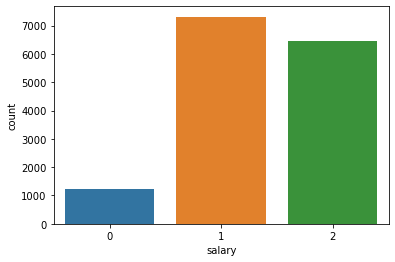

In [24]:
sns.countplot(df['salary'])

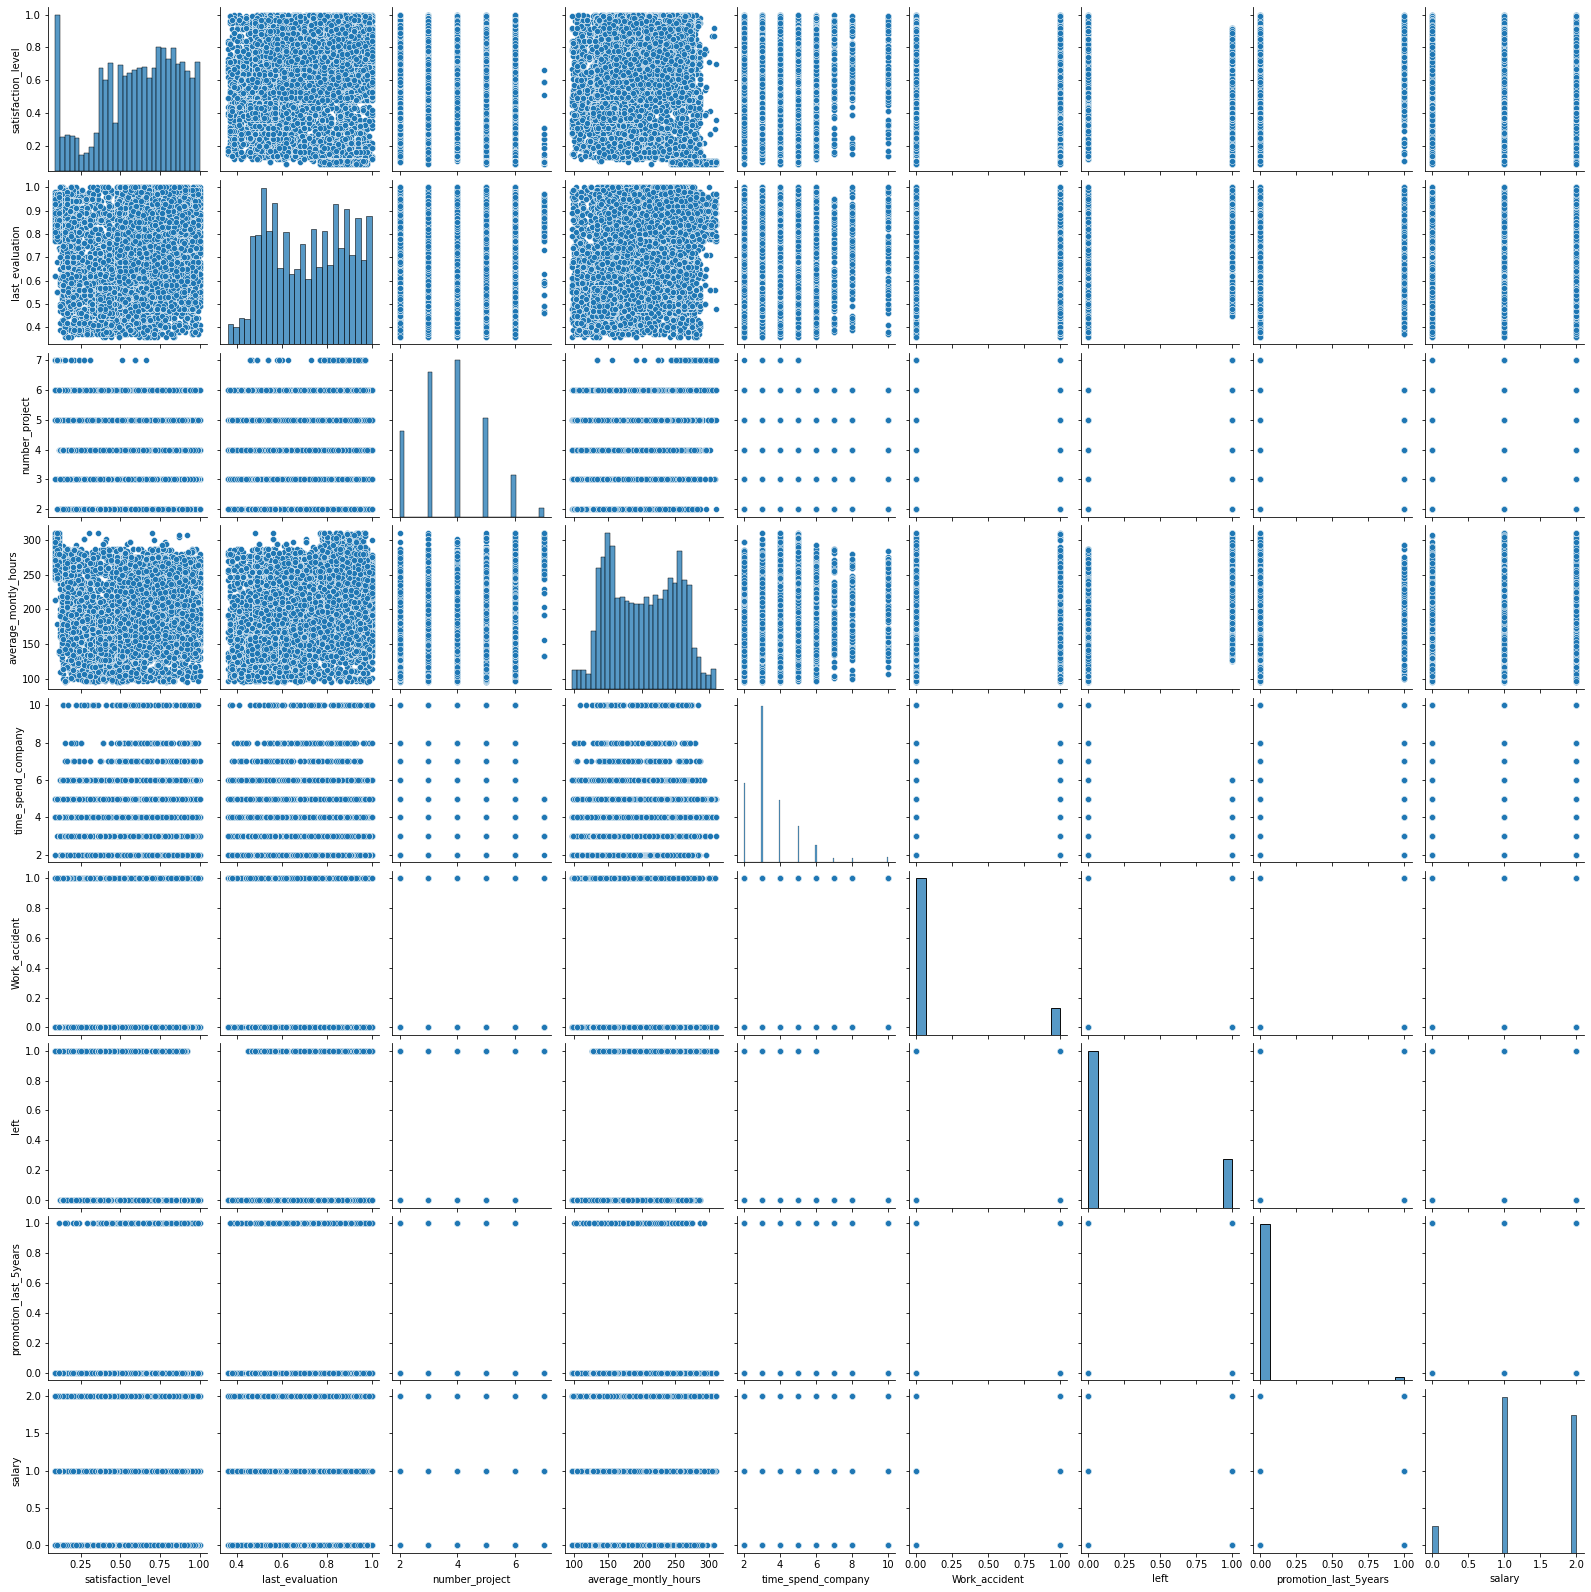

In [30]:
sns.pairplot(df)

In [26]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.001318
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,1.000000


<AxesSubplot:>

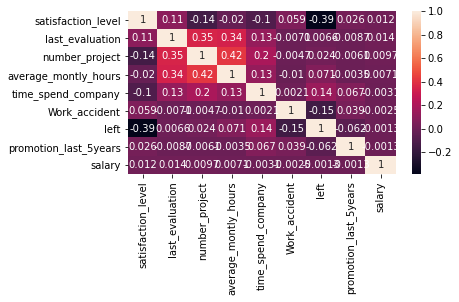

In [32]:
fig=plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

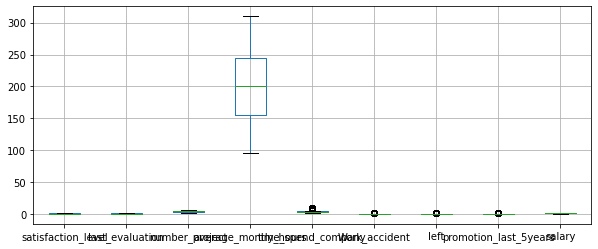

In [33]:
df.boxplot(figsize=(10,4))

In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary'],
      dtype='object')

# Assign X & Y

In [35]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (14999, 8)

Y shape:	 (14999, 1)


In [37]:
#Spliting the data between test and training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=4)

In [38]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_gauss = gauss_nb.predict(xtest)
print('Predicted value is: \t',ypred_gauss)
print()
print('Testing completed')
print('='*75)
# Performance Measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('*'*15 + 'Performance Measures on Gaussian Navie Bayes' + '*'*16)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_gauss))
print()
print('='*75)

Training Completed

Predicted value is: 	 [1 1 1 ... 1 1 1]

Testing completed
***************Performance Measures on Gaussian Navie Bayes****************
Accuracy score:	
 0.513


Confusion matrix:	
 [[  24  188    7]
 [  31 1468   18]
 [  83 1134   47]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.17      0.11      0.13       219
           1       0.53      0.97      0.68      1517
           2       0.65      0.04      0.07      1264

    accuracy                           0.51      3000
   macro avg       0.45      0.37      0.30      3000
weighted avg       0.55      0.51      0.38      3000




C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mul_nb = MultinomialNB()
mul_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_mul_nb = mul_nb.predict(xtest)
print('Predicted value is: \t',ypred_mul_nb)
print()
print('Testing completed')
print('='*75)
#Performance Measure
accuracy_mul_nb=accuracy_score(ytest,ypred_mul_nb)
print('*'*14 + 'Performance Measures on Multinomial Navie Bayes' + '*'*14)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_mul_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [1 1 1 ... 1 1 1]

Testing completed
**************Performance Measures on Multinomial Navie Bayes**************
Accuracy score:	
 0.531


Confusion matrix:	
 [[   0  176   43]
 [   0 1418   99]
 [   0 1089  175]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.53      0.93      0.68      1517
           2       0.55      0.14      0.22      1264

    accuracy                           0.53      3000
   macro avg       0.36      0.36      0.30      3000
weighted avg       0.50      0.53      0.43      3000




C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Pyth

In [40]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_ber_nb = ber_nb.predict(xtest)
print('Predicted value is: \t',ypred_ber_nb)
print()
print('Testing completed')
print('='*75)
#Performace Measure
accuracy_ber_nb=accuracy_score(ytest,ypred_ber_nb)
print('*'*15 + 'Performance Measures on Bernoulli Navie Bayes' + '*'*15)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_ber_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [1 1 1 ... 1 1 1]

Testing completed
***************Performance Measures on Bernoulli Navie Bayes***************
Accuracy score:	
 0.509


Confusion matrix:	
 [[   0  172   47]
 [   0 1319  198]
 [   0 1056  208]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.52      0.87      0.65      1517
           2       0.46      0.16      0.24      1264

    accuracy                           0.51      3000
   macro avg       0.33      0.34      0.30      3000
weighted avg       0.46      0.51      0.43      3000




C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nirmala\AppData\Roaming\Python\Pyth

# Bagging Classifier

In [41]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
bagc=BaggingClassifier(base_estimator=gauss_nb,n_estimators=20,random_state=2)
bagc.fit(xtrain,ytrain)#train the model
#test the model
ypred_bagc=bagc.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy Score:\t',accuracy_bagc)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_bagc))
print('='*100)

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


****************************************************************************************************
Confusion Matrix:
 [[  24  190    5]
 [  31 1469   17]
 [  78 1142   44]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.5123333333333333
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.11      0.14       219
           1       0.52      0.97      0.68      1517
           2       0.67      0.03      0.07      1264

    accuracy                           0.51      3000
   macro avg       0.46      0.37      0.29      3000
weighted avg       0.56      0.51      0.38      3000



In [42]:
RandomForestClassifier

NameError: name 'RandomForestClassifier' is not defined

In [43]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=15,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


****************************************************************************************************
Confusion Matrix:
 [[  78   90   51]
 [  20 1086  411]
 [  20  487  757]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.6403333333333333
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.36      0.46       219
           1       0.65      0.72      0.68      1517
           2       0.62      0.60      0.61      1264

    accuracy                           0.64      3000
   macro avg       0.65      0.56      0.59      3000
weighted avg       0.64      0.64      0.64      3000



In [44]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for_1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=10)
rand_for_1.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand_1=rand_for_1.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand_1))
print('-'*100)
accuracy_rand_1=accuracy_score(ytest,ypred_rand_1)
print('Accuracy Score:\t',accuracy_rand_1)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand_1))
print('='*100)

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


****************************************************************************************************
Confusion Matrix:
 [[  13  113   93]
 [   0 1098  419]
 [   4  770  490]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.5336666666666666
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.06      0.11       219
           1       0.55      0.72      0.63      1517
           2       0.49      0.39      0.43      1264

    accuracy                           0.53      3000
   macro avg       0.60      0.39      0.39      3000
weighted avg       0.54      0.53      0.51      3000



In [45]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)#train the model
#test the model
ypred_extra=extra_tree.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy Score:\t',accuracy_extra)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_extra))
print('='*100)

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
****************************************************************************************************
Confusion Matrix:
 [[  75   89   55]
 [  26 1072  419]
 [  34  502  728]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.625
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.34      0.42       219
           1       0.64      0.71      0.67      1517
           2       0.61      0.58      0.59      1264

    accuracy                           0.62      3000
   macro avg       0.60      0.54      0.56      3000
weighted avg       0.62      

In [ ]:
Model with Accuracy scores

In [46]:
scores=[('Gaussian_NB',accuracy_gauss),
 ('Multinomial_NB',accuracy_mul_nb),
 ('Bernoulli_NB',accuracy_ber_nb),
 ('Bagging_classifier',accuracy_bagc),
 ('RandomForest Classifier',accuracy_rand),
 ('RandomForest Classifier with pruning',accuracy_rand_1),
 ('ExtraTrees Classifier',accuracy_extra)
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))


                                  Model  Accuracy_score
4               RandomForest Classifier        0.640333
6                 ExtraTrees Classifier        0.625000
5  RandomForest Classifier with pruning        0.533667
1                        Multinomial_NB        0.531000
0                           Gaussian_NB        0.513000
3                    Bagging_classifier        0.512333
2                          Bernoulli_NB        0.509000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

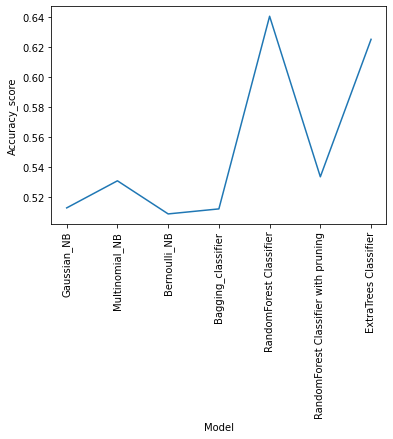

In [47]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'])
plt.xticks(rotation=90)

# Bagging Regression

In [49]:
from sklearn.ensemble import BaggingRegressor
bagc=BaggingRegressor(n_estimators=15)
print('*'*100)
print('Bagging Regression Model')
print('*'*100)
print('\n Training Phase')
bagc.fit(xtrain,ytrain)
print('Hyperparameter:\n',bagc.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_bagc=bagc.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Bagging Regression - Performance Measures')
print('*'*100)
Accuracy_bagc=r2_score(ytest,ypred_bagc)
MSE_bagc=mean_squared_error(ytest,ypred_bagc)
RMSE_bagc=np.sqrt(mean_squared_error(ytest,ypred_bagc))
print('Accuracy Score - Bagging Regression:\t',Accuracy_bagc)
print()
print('MSE-Bagging Regression:\t',MSE_bagc)
print()
print('RMSE Bagging Regression:\t',RMSE_bagc)

****************************************************************************************************
Bagging Regression Model
****************************************************************************************************

 Training Phase


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Hyperparameter:
 {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Bagging Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Bagging Regression:	 0.1470789918196801

MSE-Bagging Regression:	 0.31813716682623666

RMSE Bagging Regression:	 0.5640364942326309


In [50]:
from sklearn.ensemble import  RandomForestRegressor
rand_for= RandomForestRegressor(n_estimators=15)
print('*'*100)
print(' RandomForest Regression Model')
print('*'*100)
print('\n Training Phase')
rand_for.fit(xtrain,ytrain)
print('Hyperparameter:\n',rand_for.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_rand_for=rand_for.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print(' RandomForest Regression - Performance Measures')
print('*'*100)
Accuracy_rand_for=r2_score(ytest,ypred_rand_for)
MSE_rand_for=mean_squared_error(ytest,ypred_rand_for)
RMSE_rand_for=np.sqrt(mean_squared_error(ytest,ypred_rand_for))
print('Accuracy Score -  RandomForest Regression:\t',Accuracy_rand_for)
print()
print('MSE- RandomForest Regression:\t',MSE_rand_for)
print()
print('RMSE  RandomForest Regression:\t',RMSE_rand_for)

****************************************************************************************************
 RandomForest Regression Model
****************************************************************************************************

 Training Phase


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyperparameter:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
 RandomForest Regression - Performance Measures
****************************************************************************************************
Accuracy Score -  RandomForest Regression:	 0.1543602234754189

MSE- RandomForest Regression:	 0.31542128764428956

RMSE  RandomForest Regression:	 0.5616237954754851


In [ ]:
RandomForestRegressor

In [51]:
from sklearn.ensemble import  RandomForestRegressor
rand_for= RandomForestRegressor(n_estimators=15)
print('*'*100)
print(' RandomForest Regression Model')
print('*'*100)
print('\n Training Phase')
rand_for.fit(xtrain,ytrain)
print('Hyperparameter:\n',rand_for.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_rand_for=rand_for.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print(' RandomForest Regression - Performance Measures')
print('*'*100)
Accuracy_rand_for=r2_score(ytest,ypred_rand_for)
MSE_rand_for=mean_squared_error(ytest,ypred_rand_for)
RMSE_rand_for=np.sqrt(mean_squared_error(ytest,ypred_rand_for))
print('Accuracy Score -  RandomForest Regression:\t',Accuracy_rand_for)
print()
print('MSE- RandomForest Regression:\t',MSE_rand_for)
print()
print('RMSE  RandomForest Regression:\t',RMSE_rand_for)


****************************************************************************************************
 RandomForest Regression Model
****************************************************************************************************

 Training Phase


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyperparameter:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
 RandomForest Regression - Performance Measures
****************************************************************************************************
Accuracy Score -  RandomForest Regression:	 0.13909626337008751

MSE- RandomForest Regression:	 0.321114702363689

RMSE  RandomForest Regression:	 0.5666698354100816


In [53]:
from sklearn.ensemble import BaggingRegressor
bagc=BaggingRegressor(n_estimators=15)
print('*'*100)
print('Bagging Regression Model')
print('*'*100)
print('\n Training Phase')
bagc.fit(xtrain,ytrain)
print('Hyperparameter:\n',bagc.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_bagc=bagc.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Bagging Regression - Performance Measures')
print('*'*100)
Accuracy_bagc=r2_score(ytest,ypred_bagc)
MSE_bagc=mean_squared_error(ytest,ypred_bagc)
RMSE_bagc=np.sqrt(mean_squared_error(ytest,ypred_bagc))
print('Accuracy Score - Bagging Regression:\t',Accuracy_bagc)
print()
print('MSE-Bagging Regression:\t',MSE_bagc)
print()
print('RMSE Bagging Regression:\t',RMSE_bagc)

****************************************************************************************************
Bagging Regression Model
****************************************************************************************************

 Training Phase


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Hyperparameter:
 {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Bagging Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Bagging Regression:	 0.14601896134711656

MSE-Bagging Regression:	 0.31853255524797375

RMSE Bagging Regression:	 0.5643868843692009


In [ ]:
#ExtraTreesRegressor

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree=ExtraTreesRegressor(n_estimators=15)
print('*'*100)
print('ExtraTrees Regression Model')
print('*'*100)
print('\n Training Phase')
extra_tree.fit(xtrain,ytrain)
print('Hyperparameter:\n',extra_tree.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_extra_tree=extra_tree.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('ExtraTrees Regression - Performance Measures')
print('*'*100)
Accuracy_extra_tree=r2_score(ytest,ypred_extra_tree)
MSE_extra_tree=mean_squared_error(ytest,ypred_extra_tree)
RMSE_extra_tree=np.sqrt(mean_squared_error(ytest,ypred_extra_tree))
print('Accuracy Score - ExtraTrees Regression:\t',Accuracy_extra_tree)
print()
print('MSE-ExtraTrees Regression:\t',MSE_extra_tree)
print()
print('RMSE ExtraTrees Regression:\t',RMSE_extra_tree)

****************************************************************************************************
ExtraTrees Regression Model
****************************************************************************************************

 Training Phase


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyperparameter:
 {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
ExtraTrees Regression - Performance Measures
****************************************************************************************************
Accuracy Score - ExtraTrees Regression:	 0.1661263069457649

MSE-ExtraTrees Regression:	 0.3110325711934157

RMSE ExtraTrees Regression:	 0.5577029417112803


In [ ]:
Model with Accuracy scores

In [59]:
scores=[('Linear Regression',Accuracy_lin_reg),
        ('KNN Regression',Accuracy_knn_reg),
        ('Decision Tree Regression',Accuracy_dt_reg),
        (' Bagging Regressor',Accuracy_ada),
        ('RandomForest Regressor',Accuracy_rand_for),
        ('ExtraTrees Regressor',Accuracy_extra_tree),
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
0         Linear Regression        1.000000
2  Decision Tree Regression        1.000000
3         Bagging Regressor        1.000000
1            KNN Regression        0.960423
5      ExtraTrees Regressor        0.166126
4    RandomForest Regressor        0.144744


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

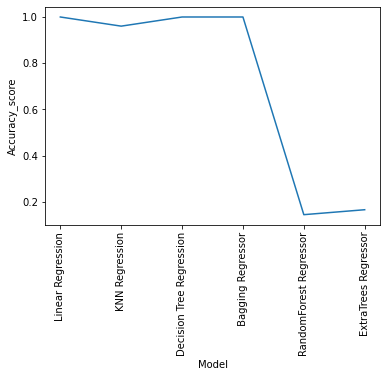

In [60]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'])
plt.xticks(rotation=90)

# Building the Base Regression Model

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data=pd.read_excel('salary.xlsx')
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium


C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_project', ylabel='Density'>

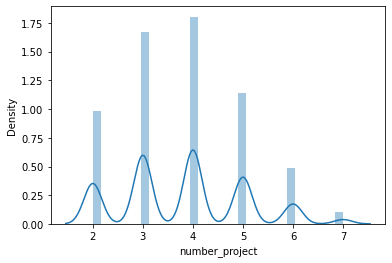

In [63]:
sns.distplot(data['number_project'])


In [64]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium


In [65]:
x=data.iloc[:,:-2]
x.head(1)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
0,0.38,0.53,2,157,3,0,1


In [66]:
y=data.number_project

In [67]:
y.shape

(14999,)

In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (11249, 7)

Training data-y- Shape:	 (11249,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (3750, 7)

Testing data(y-Outcome) Shape:	 (3750,)


# Base Model

In [ ]:
1. Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 1.0

MSE-linear Regression:	 4.295011048275515e-29

RMSE linear Regression:	 6.5536333802521445e-15


In [ ]:
2. KNN Regression

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 0.9604234327374929

MSE-knn Regression:	 0.06085925925925926

RMSE knn Regression:	 0.24669669486894075


In [ ]:
3. Decision Tree Regression model

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 1.0

MSE-DT Regression:	 0.0

RMSE DT Regression:	 0.0


In [ ]:
4.Boosting - Adaboost with the base model - Lin reg

In [72]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 1.0

MSE-Adaboost Regression:	 1.098896388654623e-30

RMSE Adaboost Regression:	 1.04828259007513e-15


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
5. Boosting - GradientBoost

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measures
********************************************************************

In [ ]:
Model with Accuracy scores

In [74]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
0         Linear Regression        1.000000
2  Decision Tree Regression        1.000000
3        Adaboost Regressor        1.000000
1            KNN Regression        0.960423
4  Gradient Boost Regressor        0.955349


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

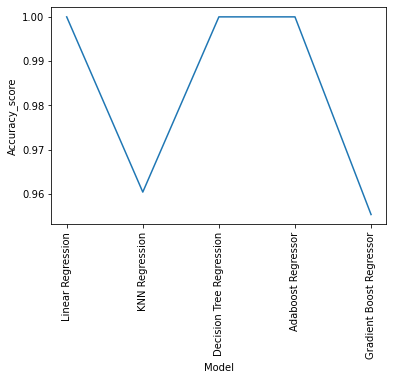

In [75]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'])
plt.xticks(rotation=90)

# Boosting Classification

In [78]:
#AdaBoostclassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=gauss_nb,n_estimators=5,random_state=2)
ada.fit(xtrain,ytrain)#train the model
#test the model
ypred_ada=ada.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_ada))
print('-'*100)
accuracy_ada=accuracy_score(ytest,ypred_ada)
print('Accuracy Score:\t',accuracy_ada)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_ada))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[ 598    0    0    0    0    0]
 [   0 1025    0    0    0    0]
 [   0    0 1101    0    0    0]
 [   0    0    0  653    0    0]
 [   0    0    0    0  302    0]
 [   0    0    0    0    0   71]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       598
           3       1.00      1.00      1.00      1025
           4       1.00      1.00      1.00      1101
           5       1.00      1.00      1.00       653
           6       1.00      1.00      1.00       302
           7       1.00      1.00      1.00        71

    accuracy                           1.00      3750


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [79]:
#GradientBoostingclassifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost=GradientBoostingClassifier(n_estimators=5,random_state=2)
grad_boost.fit(xtrain,ytrain)#train the model
#test the model
ypred_grad_boost=grad_boost.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_grad_boost))
print('-'*100)
accuracy_grad_boost=accuracy_score(ytest,ypred_grad_boost)
print('Accuracy Score:\t',accuracy_grad_boost)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_grad_boost))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[ 598    0    0    0    0    0]
 [   0 1025    0    0    0    0]
 [   0    0 1101    0    0    0]
 [   0    0    0  653    0    0]
 [   0    0    0    0  302    0]
 [   0    0    0    0    0   71]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       598
           3       1.00      1.00      1.00      1025
           4       1.00      1.00      1.00      1101
           5       1.00      1.00      1.00       653
           6       1.00      1.00      1.00       302
           7       1.00      1.00      1.00        71

    accuracy                           1.00      3750


In [80]:
scores=[('Gaussian_NB',accuracy_gauss),
 ('Multinomial_NB',accuracy_mul_nb),
 ('Bernoulli_NB',accuracy_ber_nb),
 ('AdaBoost Classifier',accuracy_ada),
 ('GradientBoosting Classifier',accuracy_grad_boost),

 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                         Model  Accuracy_score
3          AdaBoost Classifier           1.000
4  GradientBoosting Classifier           1.000
1               Multinomial_NB           0.531
0                  Gaussian_NB           0.513
2                 Bernoulli_NB           0.509


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

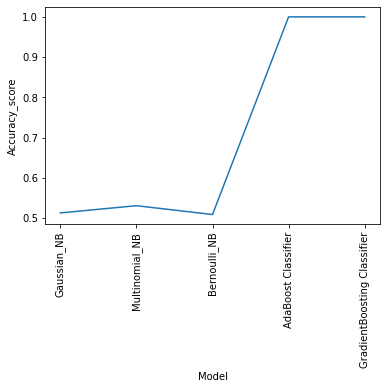

In [81]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'])
plt.xticks(rotation=90)